In [1]:
import pandas as pd
import numpy as np

In [2]:
# read the data from excel file
df = pd.read_excel('consumer_survey.xlsx')

In [3]:
# changing the column names
df.columns = ['Timestamp', 'Name', 'Gender',  'Age group','Profession', 'City', 'Locality Name',
       'Residence Type', 'delivery time','delivery charges',
       'installing many apps',  'services','smart device', 'products','suggestions']

In [4]:
# store the suggestions
suggestions = df['suggestions']


# drop unnamed , time stamp, name, locality, suggestions
df = df.drop(['Timestamp','Name', 'Locality Name', 'suggestions' ],axis=1)

In [5]:
columns = list(df.columns)

In [6]:
# mapping female to 0, male to 1
gender = {'Female': 0, 'Male':1}
df['Gender'] = df['Gender'].map(gender)

In [7]:
# mapping age group
age_group = { 'Below 18 yrs': 0, '18 -25 yrs':1, '25 - 35 yrs': 2, '26 - 35 yrs' :2,  'Above 35 yrs': 3}
df['Age group'] = df['Age group'].map(age_group)

In [8]:
# mapping profession
profession = { 'Student': 0, 'Employee':1, 'Business Man': 2, 'Business' :2,  'Others': 3}
df['Profession'] = df['Profession'].map(profession)
df['Profession'] = df['Profession'].fillna(3)

In [9]:
# mapping residence type
residence = { 'Flat / Residency': 0, 'Flat/Residency':0,  'Pg / Hostel accomodation':1, 'PG/Hostel accommodation': 1}
df['Residence Type'] = df['Residence Type'].map(residence)
df['Residence Type' ] = df['Residence Type'].fillna(0)

In [10]:
# mapping city
city = {'bangalore':0, 'Bangalore':0, 'pune':3, 'Rajanna siricilla':10, 'hyderabad':1,
       'Warangal':10, 'West Imphal':10, 'Hyderabad':1, 'HYDERABAD':1, 'Bangalore ':0,
       'Mumbai':4, 'Hyderabad ':1, 'Wgl':10, 'Hanamkonda':10, 'Kataram':10,
       'Karimnagar':10, 'Hyderbad':1, 'Bhupalapally':10, 'Hyderbadh':1, 'Huderabad':1,
       'Hyd ':1, 'Kochi':10, 'Bokaro':10, 'minneapolis ':10, 'Bhupalpally':10,
       'benguluru':0, 'Raichur':10, 'Rjy':10, 'bangalore(obvious)':0, 'Hyd':1,
       'Kharagpur':6, 'Hyberabad':1, 'khagaria':10, 'Chennai':5, 'delhi':2,
       'Bangalorr':0, 'Bengaluru':0, 'Kolkata ':6, 'Bihar':10, 'Kolkata':6,
       'Gurgaon':7, 'Bhagalpur':10, 'Bagaha':10, 'Motihari':10, 'Ranchi':10, 'Manila':10,
       'Jaipur':8, 'Gurugram':7, 'Chaibasa':10, 'Noida':7, 'Banglore':0, 'kochi':10,
       'Jamshedpur':10, 'bijapur':10, 'chandigarh ':9, 'Delhi ':2, 'Pune':3,
       'VISAKHAPATNAM':10, 'bengaluru':0, 'Tirupati':10, 'Bhubaneswar':10, 'HUBLI':10,
       'BANGALORE':0, 'Jaipur ':8, 'Anantapur':10, 'vijayawada':10, 'Ludhiana':10,
       'warangal':10, 'hyd':1, 'Chennai ':5, 'Delhi':2, 'Dharmaram':10, 'New Delhi':2,
       'Darmstadt':10, 'Den Haag':10, 'Bremen':10, 'Bonn':10}


df['City'] = df['City'].map(city)
df['City'] = df['City'].fillna(10)

In [11]:
# mapping opinion on more delivery time
more_delivery_time = {'Yes':1, 'No':0}
df['delivery time'] = df['delivery time'].map(more_delivery_time)

In [12]:
# mapping opinion on more delivery cost
more_delivery_cost = {'Yes':1, 'No':0}
df['delivery charges'] = df['delivery charges'].map(more_delivery_time)

In [13]:
# mapping opinion on installing different apps
installing_various_apps = {'Yes':1, 'No':0}
df['installing many apps'] = df['installing many apps'].map(installing_various_apps)

In [14]:
# mapping services 
services = {'Laundry':1,  'Drinking water supply':2, 'House/Room Cleaning':3,  'Electrician services':4,  'Automobile services':5 ,  'Gadgets/Electronics service':6,
           'Tailoring':7, 'Plumber service':8,  'Salon service':9  ,'House Painting':10, 'Above all':0 
           }

import re
serv = {}
for key in services:
    if key == 'Above all':
        key = "all services"
    serv[key] = [1  if re.search(key, str(service))  else 0 for service in df['services']]

In [15]:
# mapping products 
products = {'Vegetables and Fruits':1,  'Dairy products':2, 'Grocery':3,  'Bakery items':4,  'Medical products':5 ,  'Meat supply':6,
           'Clothes/Garments':7,  'Above all':0 
           }

import re
prod = {}
for key in products:
    if key == 'Above all':
        key = 'all products'
    prod[key] = [1  if re.search(key, str(service))  else 0 for service in df['products']]


In [16]:
# drop service , products columns i.e 11 th and 12 th column
df = df.drop(['services', 'products'], axis=1)

In [17]:
# insert  the new column by each service 
start = 8

for key in serv:
    df.insert(loc=start, column=key, value=serv[key])
    start += 1

In [18]:
# insert  the new column by each product 
start = 19

for key in prod:
    df.insert(loc=start, column=key, value=prod[key])
    start += 1

In [19]:
# mapping opinion on smart device
smart_device = {'Yes':1, 'No':0, 'NaN':2}
df['smart device'] = df['smart device'].map(smart_device)
df['smart device'] = df['smart device'].fillna(2)

In [20]:
# drop any na values 
df = df.dropna()

In [21]:
# convert the data to numeric
df = df.apply(pd.to_numeric)

In [22]:
# convert City, smart device columns to int
df.City = df.City.astype(int)
df['smart device'] = df['smart device'].astype(int)

In [23]:
# get the numpy matrix from the dataframe
data = df.values


# convert to int
data = data.astype(int)

In [24]:
# final column list
COLUMNS = df.columns

In [25]:
# dataset size
(m, n) = data.shape

In [51]:
# Get the percentage partician from hyderbad and bangalore
blr = np.sum(data[:, 3]== 0)
hyd = np.sum(data[:, 3]== 1)
delhi = np.sum(data[:, 3]== 2)
chennai = np.sum(data[:, 3]== 5)
kolkata = np.sum(data[:, 3]== 6)
gurgaon = np.sum(data[:, 3]== 7)
others = np.sum(data[:, 3]== 10)

PARTICIPATION = {'hyderbad':hyd, 'bangalore':blr, 'delhi':delhi,   'chennai': chennai, 'kolkata': kolkata, 'gurgaon':gurgaon,  'others': others}

In [52]:
#counts
PARTICIPATION

{'bangalore': 63,
 'chennai': 5,
 'delhi': 8,
 'gurgaon': 5,
 'hyderbad': 62,
 'kolkata': 7,
 'others': 50}

In [53]:
list(PARTICIPATION.keys())

['hyderbad', 'kolkata', 'bangalore', 'others', 'chennai', 'gurgaon', 'delhi']

In [54]:
import matplotlib.pyplot as plt

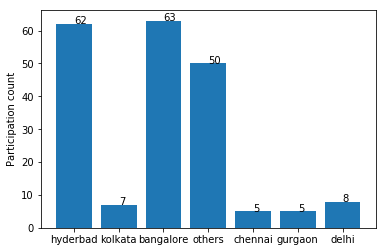

<Figure size 28800x21600 with 0 Axes>

In [55]:
fig, aux = plt.subplots()
aux.bar(list(PARTICIPATION.keys()), height=list(PARTICIPATION.values()))
plt.ylabel('Participation count')
plt.figure(figsize=(400,300))
for key, value in PARTICIPATION.items():
    aux.annotate(str(value), (key,value))
fig.savefig('participation count.png')

plt.show()

In [368]:
# bangalore data
BANGALORE = data[data[:, 4]==0, :]


# hyderbadd data
HYDERBAD =  data[data[:, 4]==1, :]

In [390]:
np.bincount(BANGALORE[:, 2]).argmax()
#np.sum(BANGALORE[:, 2]==2)

TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

In [392]:
BANGALORE.

array([[3., 0., 1., ..., 0., 0., 2.],
       [0., 1., 1., ..., 0., 0., 2.],
       [1., 1., 2., ..., 0., 0., 2.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [3., 1., 1., ..., 1., 1., 1.],
       [1., 1., 2., ..., 1., 0., 0.]])

In [387]:
data.astype(int)

array([[3, 0, 1, ..., 0, 0, 2],
       [0, 1, 1, ..., 0, 0, 2],
       [1, 1, 2, ..., 0, 0, 2],
       ...,
       [3, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 2, ..., 1, 0, 0]])